<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_3_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,55.485538,47.177917,59.010670,27.913117,-0.000518,199.586725,199.587603,-0.000878
1,0.0,1.0,29.457086,50.879847,46.278097,85.812949,0.001111,222.429091,222.428015,0.001076
2,0.0,2.0,78.523587,58.854863,65.836111,26.727229,-0.002864,239.938927,239.942064,-0.003137
3,0.0,3.0,97.836457,97.052097,42.015047,77.162697,0.000158,324.066456,324.065696,0.000760
4,0.0,4.0,40.728178,32.854344,31.337170,26.504915,0.009111,141.433719,141.424847,0.008872
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,92.525177,29.721412,68.941873,75.278071,0.002522,276.469054,276.466976,0.002078
249996,999.0,246.0,23.759658,35.293972,73.385647,80.311404,0.000798,222.751479,222.751219,0.000261
249997,999.0,247.0,42.398190,36.926678,29.595308,33.723968,0.001203,152.645348,152.644196,0.001152
249998,999.0,248.0,85.000506,91.978562,43.089811,45.857051,-0.000595,275.925336,275.925808,-0.000472


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    55.485538  47.177917  59.010670  27.913117 -0.000518  199.586725   
      1.0    29.457086  50.879847  46.278097  85.812949  0.001111  222.429091   
      2.0    78.523587  58.854863  65.836111  26.727229 -0.002864  239.938927   
      3.0    97.836457  97.052097  42.015047  77.162697  0.000158  324.066456   
      4.0    40.728178  32.854344  31.337170  26.504915  0.009111  141.433719   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  92.525177  29.721412  68.941873  75.278071  0.002522  276.469054   
      246.0  23.759658  35.293972  73.385647  80.311404  0.000798  222.751479   
      247.0  42.398190  36.926678  29.595308  33.723968  0.001203  152.645348   
      248.0  85.000506  91.978562  43.089811  45.857051 -0.000595  275.925336   
      249.0  31.083597  23.362189  23.318464  36.118539  0.015554  123.898344   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    199.587603 -0.000878  
      1.0    222.428015  0.001076  
      2.0    239.942064 -0.003137  
      3.0    324.065696  0.000760  
      4.0    141.424847  0.008872  
...                 ...       ...  
999.0 245.0  276.466976  0.002078  
      246.0  222.751219  0.000261  
      247.0  152.644196  0.001152  
      248.0  275.925808 -0.000472  
      249.0  123.882938  0.015406  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    55.485538  47.177917  59.010670  27.913117 -0.000518  199.586725   
      1.0    29.457086  50.879847  46.278097  85.812949  0.001111  222.429091   
      2.0    78.523587  58.854863  65.836111  26.727229 -0.002864  239.938927   
      3.0    97.836457  97.052097  42.015047  77.162697  0.000158  324.066456   
      4.0    40.728178  32.854344  31.337170  26.504915  0.009111  141.433719   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  92.525177  29.721412  68.941873  75.278071  0.002522  276.469054   
      246.0  23.759658  35.293972  73.385647  80.311404  0.000798  222.751479   
      247.0  42.398190  36.926678  29.595308  33.723968  0.001203  152.645348   
      248.0  85.000506  91.978562  43.089811  45.857051 -0.000595  275.925336   
      249.0  31.083597  23.362189  23.318464  36.118539  0.015554  123.898344   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    199.587603 -0.000878  
      1.0    222.428015  0.001076  
      2.0    239.942064 -0.003137  
      3.0    324.065696  0.000760  
      4.0    141.424847  0.008872  
...                 ...       ...  
999.0 245.0  276.466976  0.002078  
      246.0  222.751219  0.000261  
      247.0  152.644196  0.001152  
      248.0  275.925808 -0.000472  
      249.0  123.882938  0.015406  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,55.485538,47.177917,59.010670,27.913117,-0.000518,199.586725,199.587603,-0.000878
1,0.0,1.0,29.457086,50.879847,46.278097,85.812949,0.001111,222.429091,222.428015,0.001076
2,0.0,2.0,78.523587,58.854863,65.836111,26.727229,-0.002864,239.938927,239.942064,-0.003137
3,0.0,3.0,97.836457,97.052097,42.015047,77.162697,0.000158,324.066456,324.065696,0.000760
4,0.0,4.0,40.728178,32.854344,31.337170,26.504915,0.009111,141.433719,141.424847,0.008872
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,92.525177,29.721412,68.941873,75.278071,0.002522,276.469054,276.466976,0.002078
249996,999.0,246.0,23.759658,35.293972,73.385647,80.311404,0.000798,222.751479,222.751219,0.000261
249997,999.0,247.0,42.398190,36.926678,29.595308,33.723968,0.001203,152.645348,152.644196,0.001152
249998,999.0,248.0,85.000506,91.978562,43.089811,45.857051,-0.000595,275.925336,275.925808,-0.000472


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    55.485538  47.177917  59.010670  27.913117 -0.000518  199.586725   
      1.0    29.457086  50.879847  46.278097  85.812949  0.001111  222.429091   
      2.0    78.523587  58.854863  65.836111  26.727229 -0.002864  239.938927   
      3.0    97.836457  97.052097  42.015047  77.162697  0.000158  324.066456   
      4.0    40.728178  32.854344  31.337170  26.504915  0.009111  141.433719   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  92.525177  29.721412  68.941873  75.278071  0.002522  276.469054   
      246.0  23.759658  35.293972  73.385647  80.311404  0.000798  222.751479   
      247.0  42.398190  36.926678  29.595308  33.723968  0.001203  152.645348   
      248.0  85.000506  91.978562  43.089811  45.857051 -0.000595  275.925336   
      249.0  31.083597  23.362189  23.318464  36.118539  0.015554  123.898344   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    199.587603 -0.000878  
      1.0    222.428015  0.001076  
      2.0    239.942064 -0.003137  
      3.0    324.065696  0.000760  
      4.0    141.424847  0.008872  
...                 ...       ...  
999.0 245.0  276.466976  0.002078  
      246.0  222.751219  0.000261  
      247.0  152.644196  0.001152  
      248.0  275.925808 -0.000472  
      249.0  123.882938  0.015406  

[250000 rows x 8 columns]

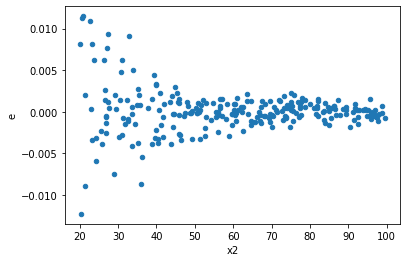

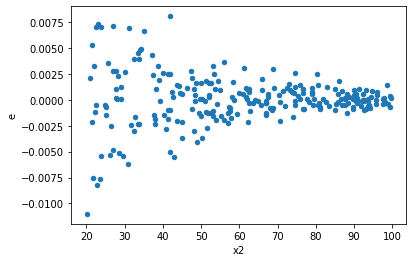

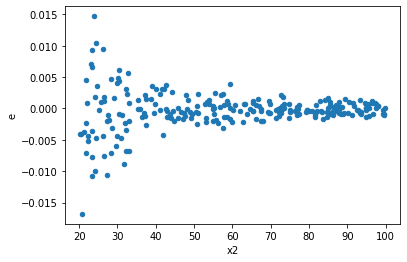

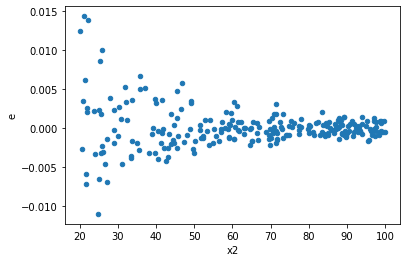

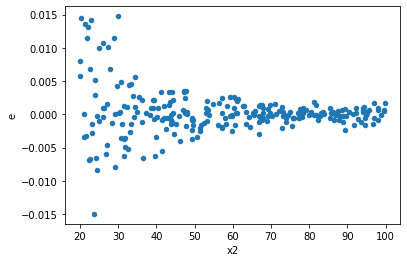

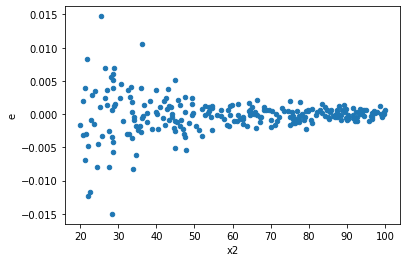

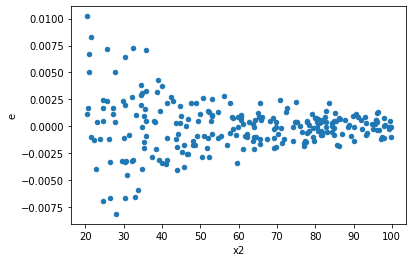

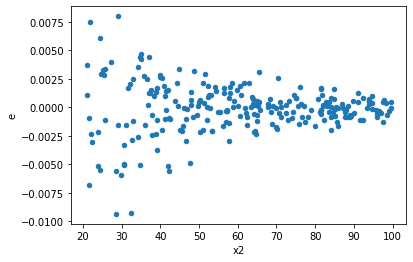

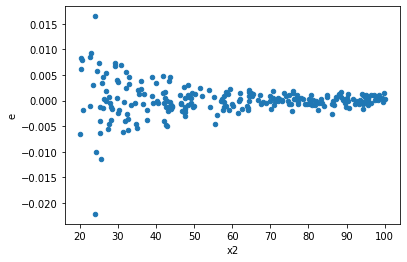

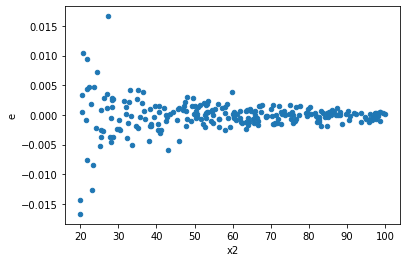

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,109.0,133.0,9.237471020706538e-05,0.001387626937561476,8.474744055694071e-07,1.0433285244823128e-05,12.31103284802228,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
2.0,116.0,126.0,9.080382386824543e-05,0.0021725824922975263,7.827915850710812e-07,1.724271819283751e-05,22.027214550692683,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,123.0,119.0,0.0006266602347285863,0.0011182136134286434,5.09479865632997e-06,9.396753054022214e-06,1.8443816307337941,0.0008770307205128169,0.9995614846397436,0.00043851536025640847,Reject001=0 : Heteroscedasticity
7.0,112.0,130.0,0.0004067312678920996,0.0007962948921655258,3.631529177608032e-06,6.125345324350198e-06,1.6867124081279612,0.004127424209059205,0.9979362878954704,0.0020637121045296025,Reject001=0 : Heteroscedasticity
9.0,111.0,131.0,0.0008247169662452997,0.0009843780172125222,7.4298825787864836e-06,7.5143360092558944e-06,1.011366724786545,0.9466891417855678,0.5266554291072161,0.4733445708927839,Reject001=1 : Homoscedasticity
10.0,112.0,130.0,0.0008531549355140835,0.0011350793042652493,7.617454781375745e-06,8.73137926357884e-06,1.1462331597854152,0.4517387874025993,0.7741306062987003,0.22586939370129966,Reject001=1 : Homoscedasticity
13.0,115.0,127.0,0.0005302667829561177,0.0006451905388459103,4.611015503966241e-06,5.080240463353624e-06,1.1017617396826733,0.5929358963090603,0.7035320518454699,0.29646794815453015,Reject001=1 : Homoscedasticity
15.0,125.0,117.0,0.0006994873433174556,0.000889274568862891,5.595898746539644e-06,7.60063734070847e-06,1.3582514060692223,0.09459782887906432,0.9527010855604678,0.04729891443953216,Reject001=1 : Homoscedasticity
16.0,107.0,135.0,0.000869100740497508,0.0013133801583780367,8.122436827079513e-06,9.728741913911383e-06,1.1977614749155803,0.32040658786315457,0.8397967060684227,0.16020329393157728,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,128.0,114.0,0.0011666863404069185,0.0006040371083340536,9.11473703442905e-06,5.298571125737312e-06,0.5813191434621806,0.00294618779887835,Reject001=0 : Heteroscedasticity
1.0,109.0,133.0,9.237471020706538e-05,0.001387626937561476,8.474744055694071e-07,1.0433285244823128e-05,12.31103284802228,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,116.0,126.0,9.080382386824543e-05,0.0021725824922975263,7.827915850710812e-07,1.724271819283751e-05,22.027214550692683,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,123.0,119.0,0.0006266602347285863,0.0011182136134286434,5.09479865632997e-06,9.396753054022214e-06,1.8443816307337941,0.0008770307205128169,Reject001=0 : Heteroscedasticity
4.0,128.0,114.0,0.001987011946400573,0.0008244303000890118,1.5523530831254475e-05,7.2318447376229105e-06,0.4658633925641836,3.049923559521855e-05,Reject001=0 : Heteroscedasticity
5.0,127.0,115.0,0.0019268776782435406,8.897028293155564e-05,1.5172265183020004e-05,7.736546341874403e-07,0.05099137306493124,1.0671137773004349e-47,Reject001=0 : Heteroscedasticity
6.0,122.0,120.0,0.0008936210543579434,0.0004339528342224401,7.32476274063888e-06,3.616273618520334e-06,0.49370522248546106,0.00012356654032819045,Reject001=0 : Heteroscedasticity
7.0,112.0,130.0,0.0004067312678920996,0.0007962948921655258,3.631529177608032e-06,6.125345324350198e-06,1.6867124081279612,0.004127424209059205,Reject001=0 : Heteroscedasticity
8.0,125.0,117.0,0.002381857581770318,0.0001076669608965015,1.9054860654162542e-05,9.202304350128333e-07,0.04829373731535573,1.5083907490770807e-48,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    590
Reject001=1 : Homoscedasticity      410
Name: Result_test, dtype: int64